# Assignment Decision tree Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [58]:
# import some data to play with
company = pd.read_csv('c:/users/mahesh/datasetcsv/Company_Data.csv')

In [59]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [60]:
label_encoder = preprocessing.LabelEncoder()

In [61]:
company['ShelveLoc']= label_encoder.fit_transform(company['ShelveLoc']) 

In [62]:
company['Urban']= label_encoder.fit_transform(company['Urban']) 

In [63]:
company['US']= label_encoder.fit_transform(company['US']) 

In [64]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


(array([ 6., 16., 47., 83., 89., 79., 40., 29.,  8.,  3.]),
 array([ 0.   ,  1.627,  3.254,  4.881,  6.508,  8.135,  9.762, 11.389,
        13.016, 14.643, 16.27 ]),
 <BarContainer object of 10 artists>)

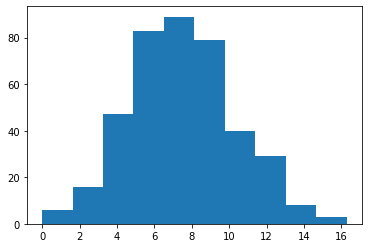

In [65]:
plt.hist(x=company['Sales'])

In [66]:
# create a list of our conditions
conditions = [
    (company['Sales'] <= 6),
    (company['Sales'] > 6) & (company['Sales']<= 10),
    (company['Sales'] > 10) 
    ]

# create a list of the values we want to assign for each condition
values = ['low', 'medium', 'high']

# create a new column and use np.select to assign values to it using our lists as arguments
company['salesclass'] = np.select(conditions, values)

In [67]:


company['salesclass']= label_encoder.fit_transform(company['salesclass']) 

In [68]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,salesclass
0,9.50,138,73,11,276,120,0,42,17,1,1,2
1,11.22,111,48,16,260,83,1,65,10,1,1,0
2,10.06,113,35,10,269,80,2,59,12,1,1,0
3,7.40,117,100,4,466,97,2,55,14,1,1,2
4,4.15,141,64,3,340,128,0,38,13,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,0
396,6.14,139,23,3,37,120,2,55,11,0,1,2
397,7.41,162,26,12,368,159,2,40,18,1,1,2
398,5.94,100,79,7,284,95,0,50,12,1,1,1


<AxesSubplot:>

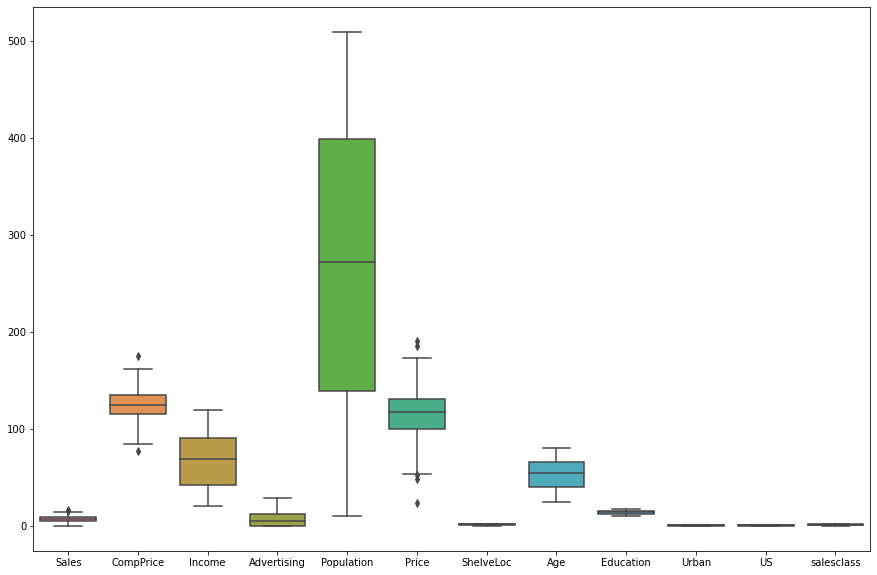

In [69]:
plt.figure(figsize=(15,10))
sns.boxplot(data=company)

# There are outliers in CompPrice, price

# Logistic regression

In [70]:
Y=company["salesclass"]

In [71]:
Y

0      2
1      0
2      0
3      2
4      1
      ..
395    0
396    2
397    2
398    1
399    2
Name: salesclass, Length: 400, dtype: int32

In [72]:
X=company.iloc[:,1:]

In [73]:
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,salesclass
0,138,73,11,276,120,0,42,17,1,1,2
1,111,48,16,260,83,1,65,10,1,1,0
2,113,35,10,269,80,2,59,12,1,1,0
3,117,100,4,466,97,2,55,14,1,1,2
4,141,64,3,340,128,0,38,13,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1,0
396,139,23,3,37,120,2,55,11,0,1,2
397,162,26,12,368,159,2,40,18,1,1,2
398,100,79,7,284,95,0,50,12,1,1,1


In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)

In [75]:
from sklearn.linear_model import LogisticRegression

In [76]:
classifier = LogisticRegression()
classifier.fit(X_test,y_test)

C:\Users\mahesh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [77]:
y_pred = classifier.predict(X_test)

In [78]:
y_pred_df= pd.DataFrame({'actual': y_test,
                         'predicted': classifier.predict(X_test)})

In [79]:
y_pred_df

,actual,predicted
398,1,2
125,2,2
328,1,1
339,0,1
172,2,2
...,...,...
12,1,1
309,0,0
399,2,2
333,1,1


In [80]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_pred_df['actual'],y_pred_df['predicted'])
print (confusion_matrix)

[[17  3  0]
 [ 0 33  8]
 [ 0  5 66]]


In [81]:
y_pred_df

,actual,predicted
398,1,2
125,2,2
328,1,1
339,0,1
172,2,2
...,...,...
12,1,1
309,0,0
399,2,2
333,1,1


In [85]:
from sklearn.metrics import classification_report
print(classification_report(y_pred_df['actual'],y_pred_df['predicted']))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        20
           1       0.80      0.80      0.80        41
           2       0.89      0.93      0.91        71

    accuracy                           0.88       132
   macro avg       0.90      0.86      0.88       132
weighted avg       0.88      0.88      0.88       132



Logistic regression
 accuracy                           0.89       132
   macro avg       0.92      0.94      0.92       132
weighted avg       0.89      0.89      0.88       132


## In presence of outlier, logistic regression will not predict accurately, and average accuracy is 0.89

In [86]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [90]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,salesclass
0,9.50,138,73,11,276,120,0,42,17,1,1,2
1,11.22,111,48,16,260,83,1,65,10,1,1,0
2,10.06,113,35,10,269,80,2,59,12,1,1,0
3,7.40,117,100,4,466,97,2,55,14,1,1,2
4,4.15,141,64,3,340,128,0,38,13,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,0
396,6.14,139,23,3,37,120,2,55,11,0,1,2
397,7.41,162,26,12,368,159,2,40,18,1,1,2
398,5.94,100,79,7,284,95,0,50,12,1,1,1


In [87]:
array = company.values


In [88]:
array

array([[  9.5 , 138.  ,  73.  , ...,   1.  ,   1.  ,   2.  ],
       [ 11.22, 111.  ,  48.  , ...,   1.  ,   1.  ,   0.  ],
       [ 10.06, 113.  ,  35.  , ...,   1.  ,   1.  ,   0.  ],
       ...,
       [  7.41, 162.  ,  26.  , ...,   1.  ,   1.  ,   2.  ],
       [  5.94, 100.  ,  79.  , ...,   1.  ,   1.  ,   1.  ],
       [  9.71, 134.  ,  37.  , ...,   1.  ,   1.  ,   2.  ]])

In [91]:
X_reg = array[:,1:]
Y_reg = array[:,11]

In [92]:
X_reg

array([[138.,  73.,  11., ...,   1.,   1.,   2.],
       [111.,  48.,  16., ...,   1.,   1.,   0.],
       [113.,  35.,  10., ...,   1.,   1.,   0.],
       ...,
       [162.,  26.,  12., ...,   1.,   1.,   2.],
       [100.,  79.,   7., ...,   1.,   1.,   1.],
       [134.,  37.,   0., ...,   1.,   1.,   2.]])

In [93]:
Y_reg

array([2., 0., 0., 2., 1., 0., 2., 0., 2., 1., 2., 0., 1., 0., 0., 2., 2.,
       0., 0., 2., 2., 0., 1., 1., 0., 0., 2., 1., 1., 2., 0., 2., 2., 2.,
       1., 0., 2., 1., 2., 1., 1., 2., 0., 1., 1., 1., 0., 1., 1., 0., 1.,
       1., 2., 2., 1., 2., 0., 1., 1., 1., 2., 2., 1., 2., 2., 1., 2., 2.,
       0., 2., 2., 2., 1., 0., 2., 2., 0., 2., 1., 2., 2., 2., 0., 1., 1.,
       2., 2., 0., 2., 2., 1., 1., 1., 2., 2., 1., 2., 2., 0., 1., 1., 2.,
       1., 1., 1., 1., 1., 2., 1., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2.,
       2., 2., 0., 2., 2., 2., 2., 0., 2., 1., 1., 2., 2., 2., 2., 1., 2.,
       1., 2., 0., 0., 2., 2., 2., 1., 2., 2., 1., 0., 2., 0., 0., 0., 2.,
       1., 2., 2., 2., 0., 0., 2., 1., 1., 1., 1., 2., 1., 2., 2., 2., 0.,
       2., 0., 2., 2., 1., 2., 1., 0., 0., 2., 1., 2., 1., 1., 2., 0., 2.,
       2., 2., 0., 2., 2., 2., 0., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1.,
       2., 1., 1., 2., 2., 1., 1., 2., 0., 2., 1., 1., 1., 1., 2., 0., 0.,
       2., 2., 1., 1., 2.

In [94]:
X_rtrain, X_rtest, y_rtrain, y_rtest = train_test_split(X_reg, Y_reg, test_size=0.33, random_state=1)

In [95]:
model_reg = DecisionTreeRegressor()
model_reg.fit(X_rtrain, y_rtrain)

DecisionTreeRegressor()

In [97]:
model_reg.score(X_rtest,y_rtest)

1.0

# Decision tree with cart algorithm

### Building Decision Tree Classifier using Entropy Criteria

In [98]:
model_cart = DecisionTreeClassifier(criterion ='entropy',max_depth=100)
model_cart.fit(X_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=100)

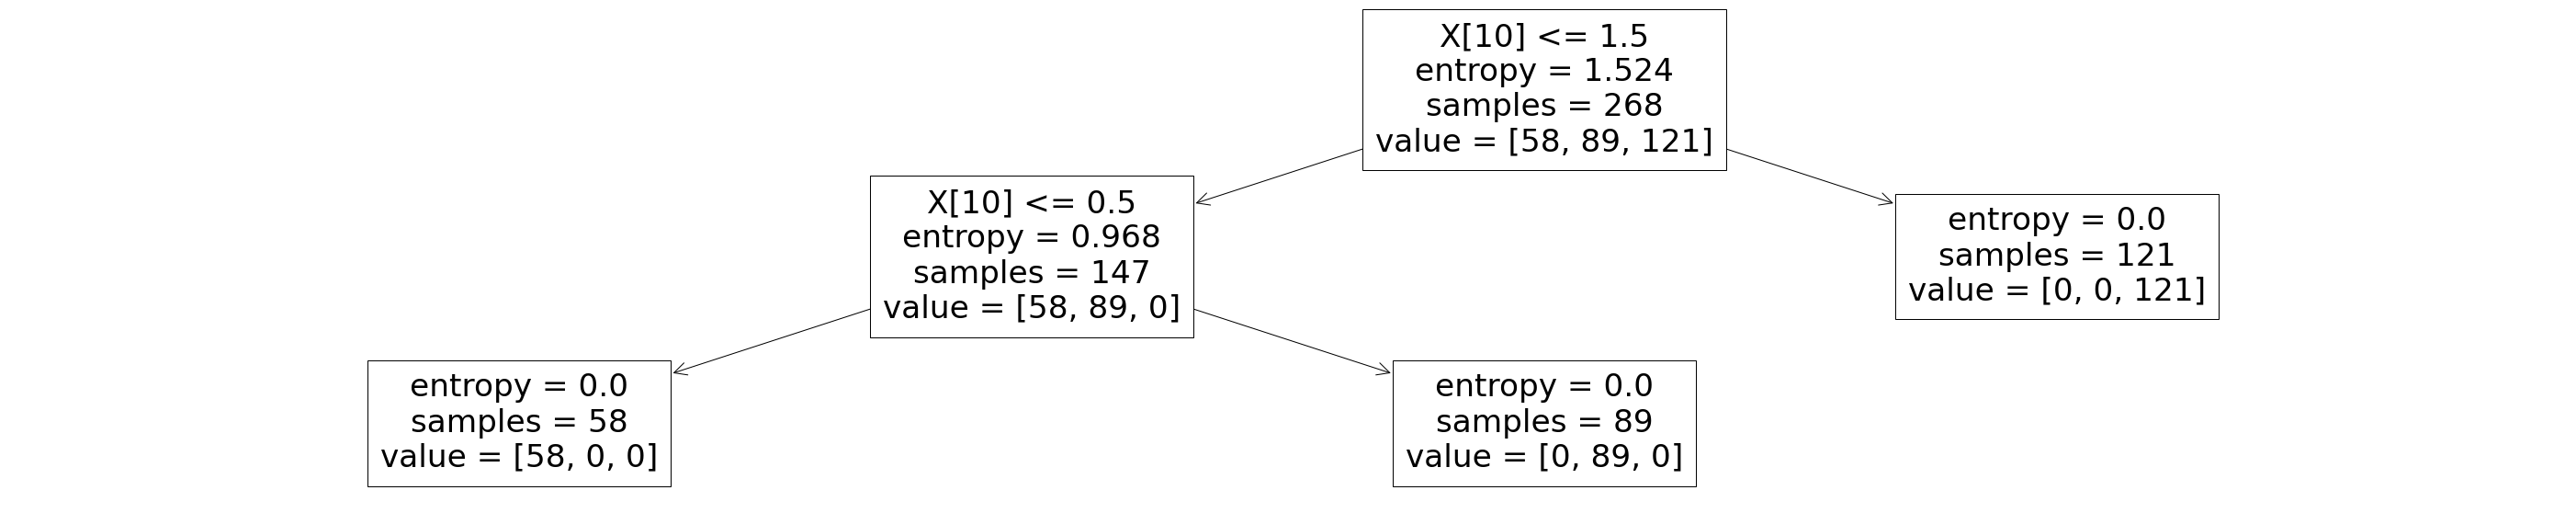

In [99]:
plt.figure(figsize=(50,10))
#PLot the decision tree
tree.plot_tree(model_cart);


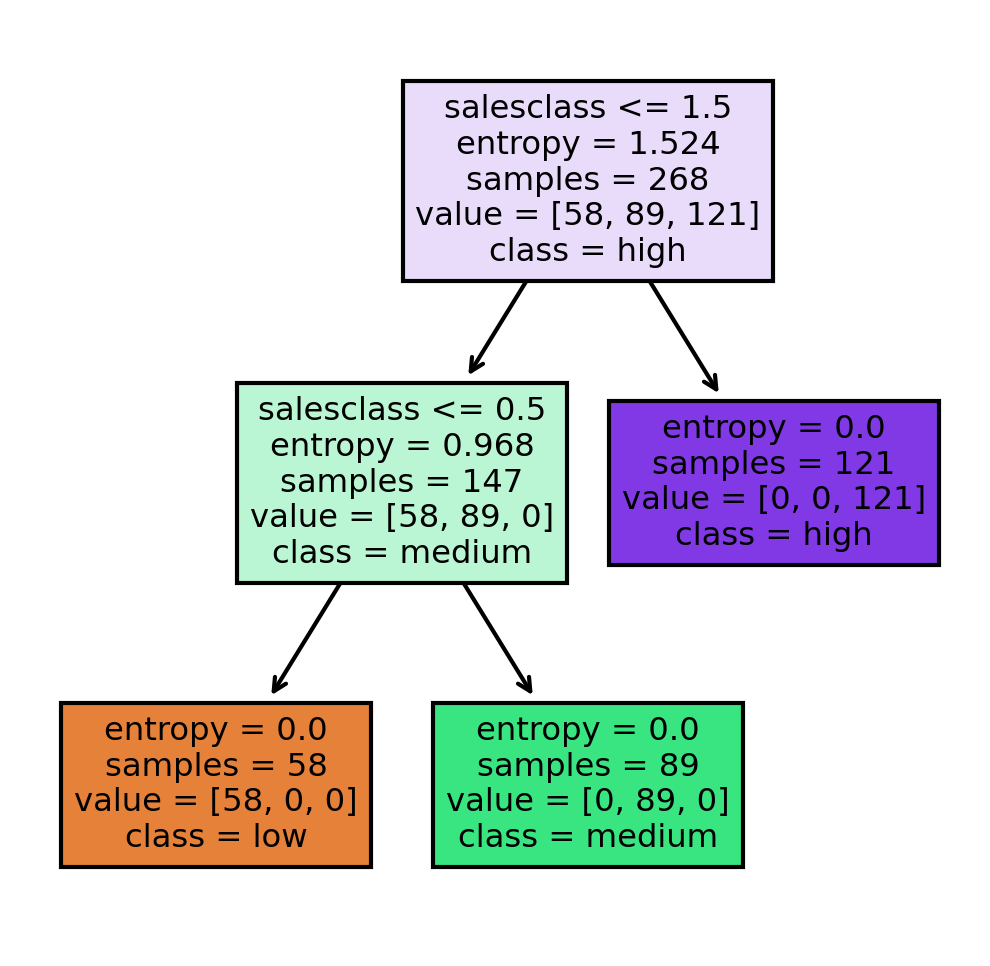

In [102]:
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US','salesclass']
cn=['low','medium','high']
fig, axes = plt.subplots(nrows = 1,ncols=1,figsize = (4,4),dpi=300)
tree.plot_tree(model_cart,feature_names = fn,class_names=cn,filled = True);

In [103]:
#Predicting on test data
preds = model_cart.predict(X_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

2    71
1    41
0    20
dtype: int64

In [104]:
preds

array([1, 2, 1, 0, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 0, 1, 1, 2, 1,
       1, 1, 0, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 0, 2, 2, 0, 1,
       1, 2, 2, 1, 2, 2, 1, 2, 0, 0, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 1, 2,
       1, 2, 0, 2, 2, 1, 2, 2, 0, 2, 2, 1, 2, 1, 2, 1, 2, 0, 1, 2, 1, 2,
       2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 2, 1, 2, 2, 0, 2, 0, 2,
       2, 2, 0, 2, 1, 1, 2, 1, 2, 0, 1, 2, 2, 2, 0, 1, 2, 1, 0, 2, 1, 0])

In [105]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1,2
salesclass,,,
0,20,0,0
1,0,41,0
2,0,0,71


In [106]:
# Accuracy 
np.mean(preds==y_test)

1.0

## Inference : Compared to logistic regression, Decision tree models are 100% accurate  compared to 89 % .
   There is no wrong prediction even in presence of outliers.Salesclass  is a root  node on which classification is done and it has purely classified the data with entropy zero. there is no impure nodes
